# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio.plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

# PREPROCESSING OF PROJECT GRADE CATEGORY

In [7]:
grade_categories=list(project_data['project_grade_category'].values)
clean_grades=[]
for i in grade_categories:
    temp=""
    for j in i.split(','):
        j=j.replace(' ','_')
        j=j.replace('-','_')
        temp+=j
        clean_grades.append(temp)
project_data['clean_grades']=clean_grades
project_data.drop(['project_grade_category'],axis=1,inplace=True)

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories   clean_grades  \
0             Literacy_Language                  ESL Literacy  Grades_PreK_2   
1  History_Civics Health_Sports  Civics_Government TeamSports     Grades_6_8   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [10]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We aren't receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which doesn't amplify the sound enough to receive the message. Due to the volume of my speaker my students can't hear videos or books clearly and it isn't making the lessons as meaningful. But with the bluetooth speaker my students will be abl

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:42<00:00, 1069.63it/s]


In [18]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [19]:
# similarly you can preprocess the titles also

In [20]:
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = sent.lower()
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:04<00:00, 24430.69it/s]


## 1.5 Preparing data for models

In [21]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'clean_grades', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [22]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [23]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [0]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

In [24]:
#vectorizing student state
vectorizer=CountVectorizer()
school_state_one_hot=vectorizer.fit_transform(project_data['school_state'].values)
print(vectorizer.get_feature_names())
print('shape of matrix after one hot encoding',school_state_one_hot.shape)

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
shape of matrix after one hot encoding (109248, 51)


In [25]:
#vectorizing project grade category
vectorizer=CountVectorizer()
project_grade_one_hot=vectorizer.fit_transform(project_data['clean_grades'].values)
print(vectorizer.get_feature_names())
print('shape of matrix after one hot encoding',project_grade_one_hot.shape)

['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
shape of matrix after one hot encoding (109248, 4)


In [26]:
#vectorizing teacher prefix
x=project_data['teacher_prefix'].fillna('')
vectorizer = CountVectorizer()

teacher_prefix_one_hot = vectorizer.fit_transform(x.values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['dr', 'mr', 'mrs', 'ms', 'teacher']
Shape of matrix after one hot encodig  (109248, 5)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [27]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


In [28]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer=CountVectorizer(min_df=10)
title_bow=vectorizer.fit_transform(preprocessed_title)
print('Shape of matrix after vectorizing',title_bow.shape)

Shape of matrix after vectorizing (109248, 3222)


#### 1.5.2.2 TFIDF vectorizer

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16623)


In [30]:
vectorizer=TfidfVectorizer(min_df=10)
title_tfidf=vectorizer.fit_transform(preprocessed_title)
print('Shape of matrix after vectorizing',title_tfidf.shape)

Shape of matrix after vectorizing (109248, 3222)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [0]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:59<00:00, 1823.16it/s]


109248
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [07:32<00:00, 241.33it/s]


109248
300


In [0]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [22]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [23]:
data1=project_data.drop(['id','teacher_id','project_essay_1','project_essay_2','project_essay_3','project_essay_4','project_is_approved'],axis=1)
data1.head(2)
data=data1[0:100000]
data[0:2]

Unnamed: 0 teacher_prefix school_state project_submitted_datetime  \
0      160221           Mrs.           IN        2016-12-05 13:43:57   
1      140945            Mr.           FL        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects              clean_categories  \
0                                             0             Literacy_Language   
1                                             7  History_Civics Health_Sports   

            clean_subcategories   clean_grades  \
0                  ESL Literacy  Grades_PreK_2   
1  Civics_Government TeamSports     Grades_6_8   

                                               essay  price  quantity  
0  My students are English learners that are work...  154.6        23  
1  Our students arrive to our school eager to lea...  299.0         1

In [24]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [25]:
price_standardized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

In [26]:
projects_scalar = StandardScaler()
projects_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
projects_standardized = projects_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
projects_standardized

C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



Mean : 298.1193425966608, Standard deviation : 367.49634838483496


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



array([[-0.40152481],
       [-0.14951799],
       [-0.36552384],
       ...,
       [-0.29352189],
       [-0.40152481],
       [-0.40152481]])

In [27]:
projects_scalar = StandardScaler()
projects_scalar.fit(project_data['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
quantity_standardized = projects_scalar.transform(project_data['quantity'].values.reshape(-1,1))
quantity_standardized

C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



Mean : 298.1193425966608, Standard deviation : 367.49634838483496


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



array([[ 0.23047132],
       [-0.60977424],
       [ 0.19227834],
       ...,
       [-0.4951953 ],
       [-0.03687954],
       [-0.45700232]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [36]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(teacher_prefix_one_hot.shape)
print(school_state_one_hot.shape)
print(project_grade_one_hot.shape)
print(title_bow.shape)
print(text_bow.shape)
print(price_standardized.shape)
print(projects_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 5)
(109248, 51)
(109248, 4)
(109248, 3222)
(109248, 16623)
(109248, 1)
(109248, 1)


In [37]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109248, 16663)

In [28]:
y1=project_data['project_is_approved']
print(y1.shape)
y=y1[0:100000]

(109248,)


In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [0]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

D:\installed\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features.
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● As this is very computationally expensive, take <b>5k</b> datapoints only to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● Take <b>5k</b> datapoints only.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.30,stratify=y)
X_train,X_cv,y_train,y_cv=train_test_split(X_train,y_train,test_size=0.30,stratify=y_train)
    
    


<h1>2. Clustering </h1>

<h2>2.1 Choose the best data matrix on which you got the best AUC</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [32]:
statevectorizer=CountVectorizer()
statevectorizer.fit(X_train['school_state'].values)

X_train_state_encoded=statevectorizer.transform(X_train['school_state'].values)
X_cv_state_encoded=statevectorizer.transform(X_cv['school_state'].values)
X_test_state_encoded=statevectorizer.transform(X_test['school_state'].values)

print("AFTER VECTORIZATION")
print('='*50)
print(X_train_state_encoded.shape,y_train.shape)
print(X_cv_state_encoded.shape,y_cv.shape)
print(X_test_state_encoded.shape,y_test.shape)

AFTER VECTORIZATION
(49000, 51) (49000,)
(21000, 51) (21000,)
(30000, 51) (30000,)


In [33]:
X_train['teacher_prefix'].unique()

array(['Ms.', 'Mrs.', 'Mr.', 'Teacher', 'Dr.', nan], dtype=object)

In [34]:
X_train['teacher_prefix'].fillna('',inplace=True)
X_cv['teacher_prefix'].fillna('',inplace=True)
X_test['teacher_prefix'].fillna('',inplace=True)

In [35]:
prefixvectorizer=CountVectorizer()
prefixvectorizer.fit(X_train['teacher_prefix'].values)

X_train_prefix_encoded=prefixvectorizer.transform(X_train['teacher_prefix'].values)
X_cv_prefix_encoded=prefixvectorizer.transform(X_cv['teacher_prefix'].values)
X_test_prefix_encoded=prefixvectorizer.transform(X_test['teacher_prefix'].values)
print('AFTER VECTORIZATION')
print('='*50)
print(prefixvectorizer.get_feature_names())

print(X_train_prefix_encoded.shape,y_train.shape)
print(X_cv_prefix_encoded.shape,y_cv.shape)
print(X_test_prefix_encoded.shape,y_test.shape)

AFTER VECTORIZATION
['dr', 'mr', 'mrs', 'ms', 'teacher']
(49000, 5) (49000,)
(21000, 5) (21000,)
(30000, 5) (30000,)


In [36]:
#encoding grade category
gradevectorizer=CountVectorizer()
gradevectorizer.fit(X_train['clean_grades'].values)

X_train_grade_encoded=gradevectorizer.transform(X_train['clean_grades'].values)
X_cv_grade_encoded=gradevectorizer.transform(X_cv['clean_grades'].values)
X_test_grade_encoded=gradevectorizer.transform(X_test['clean_grades'].values)

print("AFTER VECTORIZATION")
print('='*50)
print(gradevectorizer.get_feature_names())
print(X_train_grade_encoded.shape,y_train.shape)
print(X_cv_grade_encoded.shape,y_cv.shape)
print(X_test_grade_encoded.shape,y_test.shape)

AFTER VECTORIZATION
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
(49000, 4) (49000,)
(21000, 4) (21000,)
(30000, 4) (30000,)


In [37]:
#encoding clean category
categoryvectorizer=CountVectorizer()
categoryvectorizer.fit(X_train['clean_categories'].values)

X_train_category_encoded=categoryvectorizer.transform(X_train['clean_categories'].values)
X_cv_category_encoded=categoryvectorizer.transform(X_cv['clean_categories'].values)
X_test_category_encoded=categoryvectorizer.transform(X_test['clean_categories'].values)

print('AFTER VECTORIZATION')
print('='*50)
print(categoryvectorizer.get_feature_names())
print(X_train_category_encoded.shape,y_train.shape)
print(X_cv_category_encoded.shape,y_cv.shape)
print(X_test_category_encoded.shape,y_test.shape)

AFTER VECTORIZATION
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
(49000, 9) (49000,)
(21000, 9) (21000,)
(30000, 9) (30000,)


In [38]:
#encoding subcategories
subcategoryvectorizer=CountVectorizer()
subcategoryvectorizer.fit(X_train['clean_subcategories'].values)
X_train_subcategories_encoded=subcategoryvectorizer.transform(X_train['clean_subcategories'].values)
X_cv_subcategories_encoded=subcategoryvectorizer.transform(X_cv['clean_subcategories'].values)
X_test_subcategories_encoded=subcategoryvectorizer.transform(X_test['clean_subcategories'].values)
print("AFTER VECTORIZATION")
print('='*50)
print(subcategoryvectorizer.get_feature_names())
print(X_train_subcategories_encoded.shape,y_train.shape)
print(X_cv_subcategories_encoded.shape,y_cv.shape)
print(X_test_subcategories_encoded.shape,y_test.shape)



AFTER VECTORIZATION
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']
(49000, 30) (49000,)
(21000, 30) (21000,)
(30000, 30) (30000,)


In [39]:
#encoding numerical categories---price
from sklearn.preprocessing import Normalizer
normalizer=Normalizer()
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm=normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm=normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm=normalizer.transform(X_test['price'].values.reshape(1,-1))

print("after vectorization")
print(X_train_price_norm.shape,y_train.shape)
print(X_cv_price_norm.shape,y_cv.shape)
print(X_test_price_norm.shape,y_test.shape)

after vectorization
(1, 49000) (49000,)
(1, 21000) (21000,)
(1, 30000) (30000,)


In [40]:
price_train_norm=X_train_price_norm.reshape(49000,1)
price_cv_norm=X_cv_price_norm.reshape(21000,1)
price_test_norm=X_test_price_norm.reshape(30000,1)
print(price_train_norm.shape)
print(price_cv_norm.shape)
print(price_test_norm.shape)

(49000, 1)
(21000, 1)
(30000, 1)


In [41]:
#encoding numerical category quantity
normalizer=Normalizer()
normalizer.fit(X_train['quantity'].values.reshape(1,-1))

X_train_quantity_norm=normalizer.transform(X_train['quantity'].values.reshape(1,-1))
X_cv_quantity_norm=normalizer.transform(X_cv['quantity'].values.reshape(1,-1))
X_test_quantity_norm=normalizer.transform(X_test['quantity'].values.reshape(1,-1))

print('after vectorization')
print(X_train_quantity_norm.shape,y_train.shape)
print(X_cv_quantity_norm.shape,y_cv.shape)
print(X_test_quantity_norm.shape,y_test.shape)

after vectorization
(1, 49000) (49000,)
(1, 21000) (21000,)
(1, 30000) (30000,)


In [42]:
train_quantity_norm=X_train_quantity_norm.reshape(49000,1)
cv_quantity_norm=X_cv_quantity_norm.reshape(21000,1)
test_quantity_norm=X_test_quantity_norm.reshape(30000,1)
print(train_quantity_norm.shape)
print(cv_quantity_norm.shape)
print(test_quantity_norm.shape)

(49000, 1)
(21000, 1)
(30000, 1)


In [43]:
#encoding previous projects posted by teachers
normalizer=Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_projects_norm=normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_projects_norm=normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_projects_norm=normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

print("after vectorization")
print(X_train_projects_norm.shape,y_train.shape)
print(X_cv_projects_norm.shape,y_cv.shape)
print(X_test_projects_norm.shape,y_test.shape)

after vectorization
(1, 49000) (49000,)
(1, 21000) (21000,)
(1, 30000) (30000,)


In [44]:
projects_train_norm=X_train_projects_norm.reshape(49000,1)
projects_cv_norm=X_cv_projects_norm.reshape(21000,1)
projects_test_norm=X_test_projects_norm.reshape(30000,1)
print(price_train_norm.shape)
print(price_cv_norm.shape)
print(price_test_norm.shape)

(49000, 1)
(21000, 1)
(30000, 1)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [45]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.4 Dimensionality Reduction on the selected features </h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [46]:
essaybowvectorizer=TfidfVectorizer(min_df=10,ngram_range=(1,1))
essaybowvectorizer.fit(X_train['essay'].values)
X_train_essay=essaybowvectorizer.transform(X_train['essay'].values)
#print(X_train_essay_bow.shape)
X_cv_essay=essaybowvectorizer.transform(X_cv["essay"].values)
X_test_essay=essaybowvectorizer.transform(X_test['essay'].values)

print('AFTER VECTORIZATION')
print('='*50)
print(X_train_essay.shape, y_train.shape)
print(X_cv_essay.shape, y_cv.shape)
print(X_test_essay.shape, y_test.shape)

AFTER VECTORIZATION
(49000, 12543) (49000,)
(21000, 12543) (21000,)
(30000, 12543) (30000,)


In [47]:
#encoding project title
titlevectorizer=TfidfVectorizer(min_df=10,ngram_range=(1,1))
titlevectorizer.fit(X_train['project_title'].values)
X_train_title=titlevectorizer.transform(X_train['project_title'].values)
X_cv_title=titlevectorizer.transform(X_cv['project_title'].values)
X_test_title=titlevectorizer.transform(X_test['project_title'].values)
print("after vectorization")
print(X_train_title.shape,y_train.shape)
print(X_cv_title.shape,y_cv.shape)
print(X_test_title.shape,y_test.shape)

after vectorization
(49000, 2093) (49000,)
(21000, 2093) (21000,)
(30000, 2093) (30000,)


In [79]:
from scipy.sparse import hstack
final_train=hstack((X_train_state_encoded,X_train_prefix_encoded,X_train_grade_encoded,X_train_category_encoded,X_train_subcategories_encoded,price_train_norm,projects_train_norm,train_quantity_norm,X_train_essay,X_train_title)).tocsr()
final_cv=hstack((X_cv_state_encoded,X_cv_prefix_encoded,X_cv_grade_encoded,X_cv_category_encoded,X_cv_subcategories_encoded,price_cv_norm,projects_cv_norm,cv_quantity_norm,X_cv_essay,X_cv_title)).tocsr()
final_test=hstack((X_test_state_encoded,X_test_prefix_encoded,X_test_grade_encoded,X_test_category_encoded,X_test_subcategories_encoded,price_test_norm,projects_test_norm,test_quantity_norm,X_test_essay,X_test_title)).tocsr()
print(final_train.shape,y_train.shape)
print(final_cv.shape,y_cv.shape)
print(final_test.shape,y_test.shape)


(49000, 14738) (49000,)
(21000, 14738) (21000,)
(30000, 14738) (30000,)


# DIMENSIONALITY REDUCTION

In [80]:
 from sklearn.feature_selection import SelectKBest, chi2
final_train_5000=SelectKBest(chi2,k=5000).fit_transform(final_train,y_train)
final_train_5000.shape

(49000, 5000)

<h2>2.5 Apply Kmeans</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<function matplotlib.pyplot.show(*args, **kw)>

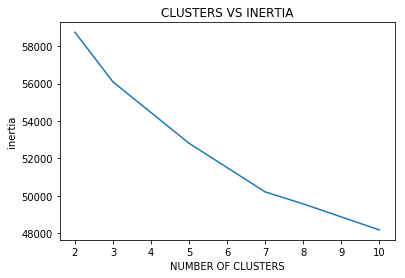

In [52]:
from sklearn.cluster import KMeans

clusters=[2,3,5,7,8,10]
k=[]
for i in clusters:
    kmeans=KMeans(n_clusters=i,init='k-means++', n_init=10, max_iter=100, tol=0.0001, precompute_distances='auto',n_jobs=-1)
    kmeans.fit(final_train_5000[0:10000],y_train[0:10000])
    k.append(kmeans.inertia_) 
plt.plot(clusters,k)
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('inertia')
plt.title('CLUSTERS VS INERTIA')
plt.show

OBSERVATIONS:
    Here for k means clustering we took tfidf vectorizer and 10k datapoints.
    We tried for different number of clusters and we plotted the error and we chose our number of clusters to be 5.

In [53]:
kmeans=KMeans(n_clusters=5,init='k-means++', n_init=10, max_iter=100, tol=0.0001, precompute_distances='auto',n_jobs=-1)
kmeans.fit(final_train_5000[0:10000],y_train[0:10000])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
kmeans.cluster_centers_

array([[0.00074627, 0.02089552, 0.00522388, ..., 0.        , 0.        ,
        0.00094287],
       [0.00299529, 0.01968335, 0.01497647, ..., 0.        , 0.        ,
        0.00089277],
       [0.00406298, 0.01117318, 0.00406298, ..., 0.00090328, 0.00020248,
        0.00105266],
       [0.00389273, 0.01470588, 0.0116782 , ..., 0.00103517, 0.00068076,
        0.00021312],
       [0.00391773, 0.01469148, 0.00881489, ..., 0.0005562 , 0.        ,
        0.00068289]])

In [55]:
kmeans.labels_

array([3, 4, 4, ..., 4, 1, 2])

In [56]:
X_train.columns

Index(['Unnamed: 0', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'clean_grades', 'essay', 'price', 'quantity'],
      dtype='object')

In [57]:
essays = X_train['essay'].values
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
for i in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[i] == 0:
        cluster1.append(essays[i])
    elif kmeans.labels_[i] == 1:
        cluster2.append(essays[i])
    elif kmeans.labels_[i] == 2:
        cluster3.append(essays[i])
    elif  kmeans.labels_[i] == 3:
        cluster4.append(essays[i])
    elif  kmeans.labels_[i] == 4:
        cluster5.append(essays[i])

In [58]:
len(cluster2)

2337

In [59]:
for i in range(3):
    print((cluster1[i]))

My students are very hands on! They love to read, write and do math. They are very energetic. They have a lot to say and express. There is never a dull moment in my classroom!\r\n              My students are full of creativity in their own unique ways. They are very passionate about their learning and helping their peers succeed as well. Unfortunately, my students come from a low-income community which makes it hard for them to have the necessary materials they need in order to express their creativity and uniqueness.  \r\nThe supplies that I am requesting for my students are meaningful.  In other words, I know exactly when and how each supply will be utilized. We just need your help in getting everything into our classroom.  The literacy and math supplies will be used during center time. Not only will this allow me to conduct guided reading, but it will allow the other students to engage in meaningful activities that target each of their specific needs. For example, the read along se

In [60]:
for i in range(3):
    print((cluster2[i]))

I teach Math and Science to forty-four 4th grade students. Most of my students love these subjects, which makes them very easy to teach!  My students come from two learning backgrounds, Montessori and Traditional learning.\r\nMy students are eager to learn!  They enjoy hands-on activities and like to stay engaged.  Downtime can be difficult for them, as they like to stay busy.  Technology, one-on-one, and small groups helps to keep my active students engaged in learning.  Allowing student choice is something that I strive to accomplish each day!My students love to read and watch Science unfold, but they learn best when they get to be the scientist!\r\nMy students enjoy learning through hands on Science experiments!  When they are allowed to explore and investigate, they get to learn from their mistakes and tap into their higher order thinking skills to solve problems and experiment.  They love \"trying out\" experiments they have read about.  This set of Science centers will allow my s

In [61]:
for i in range(3):
    print((cluster3[i]))

Every morning on the news, you hear about the budget cuts my school district is facing due to the state not passing the budget. In preparation for the upcoming school year, I will not allow the budget cuts to impact my incoming group of students. We must continue to learn and achieve greatness.\r\n\r\nDue to the budget cuts, a growing class size is a now reality and in order to prepare for them, I need your help!\r\n\r\nI teach at an awesome S.T.E.M school on the west side of Chicago. We are a Title I school in addition to having a 96.7% low income rate as well as a high mobility rate of 41.4%.\r\n\r\nMany students see my school as a safe and nurturing place due to all of the violence occurring around them daily. I want to continue to provide a engaging learning environment despite the growing class size. \r\nToday's student is more interested in video games than a book. It is extremely impossible to get a student to read, let alone comprehend a nonfiction text. Due to this, I have to 

In [62]:
for i in range(3):
    print((cluster4[i]))

Students at my school want to combine improving their physical fitness with the latest technology.  They love to move and by using this modern technology they will strive to improve their overall fitness level.\r\nThe technology that is out there today can help my students work for a personal goal that they can challenge themselves to improve on for the rest of their lives.  By being able to use this technology and see how if they work hard and are consistent they will improve their overall health!\r\nBy donating to The Fitbit project you are helping my students through the use of technology see how exercise can help them live better lives.  Daily exercise is important for everyone.  In order to teach children this they need to understand how their body functions.  With the fitbit they will be able to track their steps during PE class and during a normal day.  \r\nIf we do not teach our children about the importance of exercise now who will teach them when they are adults?  Children wh

In [63]:
for i in range(3):
    print((cluster5[i]))

Every student that walks through my door has their own unique story.  A wide range of cultures, languages, and backgrounds are puzzled together to create a dynamic, well-rounded, and curious group of students.  \r\nThough their dreams and challenges may differ, my students all share something very much in common - the desire to learn and be engaged as they prepare for their future.\r\nI hope to create a classroom environment that my students can thrive and feel inspired within.  I want them to come to class ready to be shocked, amazed, intrigued, challenged, and more.  Most of all, I hope my students find my classroom as a place to feel appreciated for their individuality and pushed to discover their potential.\r\nWith the shift to Common Core standards, it is imperative that students justify and cite their thinking during discussion as well as in their writing.  In my classroom, I use interactive notebooks with my students as a way to document information, but also process their under

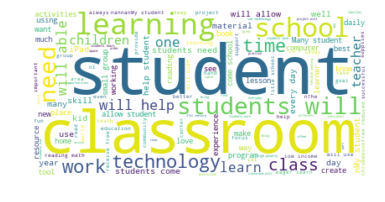

In [64]:
words=''
for i in cluster1:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


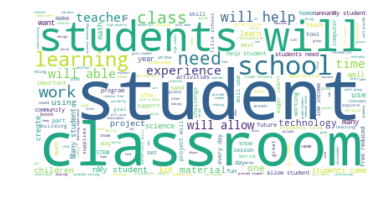

In [65]:
words=''
for i in cluster2:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


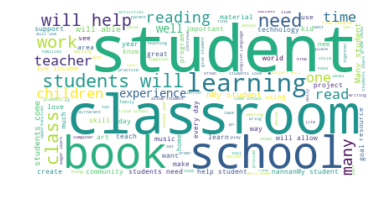

In [66]:
words=''
for i in cluster3:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


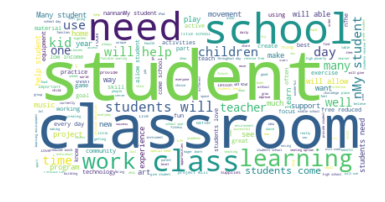

In [67]:
words=''
for i in cluster4:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


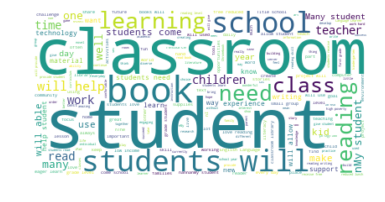

In [68]:
words=''
for i in cluster5:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


<h2>2.6 Apply AgglomerativeClustering</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

# for 2 clusters

In [72]:
from sklearn.cluster import AgglomerativeClustering
agg_cl=AgglomerativeClustering(n_clusters=2)
agg_cl.fit(final_train_5000[0:5000].toarray(),y_train[0:5000])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func=<function mean at 0x000002C4DD79D2F0>)

In [73]:
agg_cl.labels_

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

(49000, 14738)

In [85]:
cluster1=[]
cluster2=[]
essays = X_train['essay'].values
for i in range(agg_cl.labels_.shape[0]):
    if agg_cl.labels_[i] == 0:
        cluster1.append(essays[i])
    elif agg_cl.labels_[i] == 1:
        cluster2.append(essays[i])
print(len(cluster1))
print(len(cluster2))

3361
1639


In [86]:
for i in range(5):
    print((cluster1[i]))

Students at my school want to combine improving their physical fitness with the latest technology.  They love to move and by using this modern technology they will strive to improve their overall fitness level.\r\nThe technology that is out there today can help my students work for a personal goal that they can challenge themselves to improve on for the rest of their lives.  By being able to use this technology and see how if they work hard and are consistent they will improve their overall health!\r\nBy donating to The Fitbit project you are helping my students through the use of technology see how exercise can help them live better lives.  Daily exercise is important for everyone.  In order to teach children this they need to understand how their body functions.  With the fitbit they will be able to track their steps during PE class and during a normal day.  \r\nIf we do not teach our children about the importance of exercise now who will teach them when they are adults?  Children wh

In [87]:
for i in range(5):
    print((cluster2[i]))

I teach Math and Science to forty-four 4th grade students. Most of my students love these subjects, which makes them very easy to teach!  My students come from two learning backgrounds, Montessori and Traditional learning.\r\nMy students are eager to learn!  They enjoy hands-on activities and like to stay engaged.  Downtime can be difficult for them, as they like to stay busy.  Technology, one-on-one, and small groups helps to keep my active students engaged in learning.  Allowing student choice is something that I strive to accomplish each day!My students love to read and watch Science unfold, but they learn best when they get to be the scientist!\r\nMy students enjoy learning through hands on Science experiments!  When they are allowed to explore and investigate, they get to learn from their mistakes and tap into their higher order thinking skills to solve problems and experiment.  They love \"trying out\" experiments they have read about.  This set of Science centers will allow my s

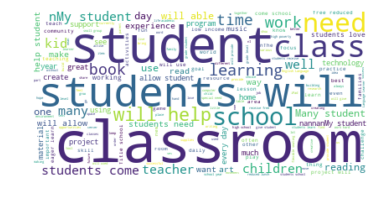

In [88]:
#plotting word cloud for cluster 1
words=''
for i in cluster1:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


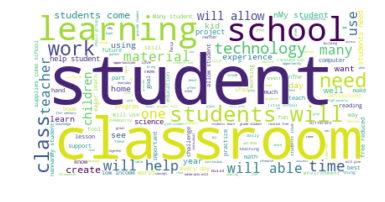

In [89]:
#plotting word cloud for cluster 2
words=''
for i in cluster2:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# for 5 clusters

In [90]:
from sklearn.cluster import AgglomerativeClustering
agg_cl=AgglomerativeClustering(n_clusters=5)
agg_cl.fit(final_train_5000[0:5000].toarray(),y_train[0:5000])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func=<function mean at 0x000002C4DD79D2F0>)

In [91]:
agg_cl.labels_

array([4, 1, 2, ..., 2, 3, 0], dtype=int64)

In [92]:
essays = X_train['essay'].values
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
for i in range(agg_cl.labels_.shape[0]):
    if agg_cl.labels_[i] == 0:
        cluster1.append(essays[i])
    elif agg_cl.labels_[i] == 1:
        cluster2.append(essays[i])
    elif agg_cl.labels_[i] == 2:
        cluster3.append(essays[i])
    elif agg_cl.labels_[i] == 3:
        cluster4.append(essays[i])
    elif agg_cl.labels_[i] == 4:
        cluster5.append(essays[i])

In [94]:
print(len(cluster1))
print(len(cluster2))
print(len(cluster3))
print(len(cluster4))
print(len(cluster5))

1639
949
1196
637
579


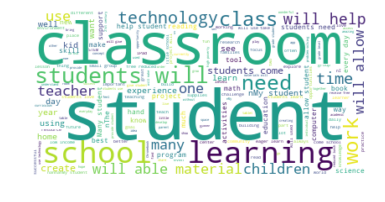

In [95]:
#plotting word cloud for cluster 1
words=''
for i in cluster1:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


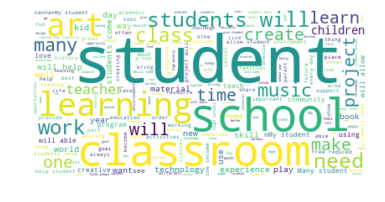

In [96]:
#plotting word cloud for cluster 2
words=''
for i in cluster2:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


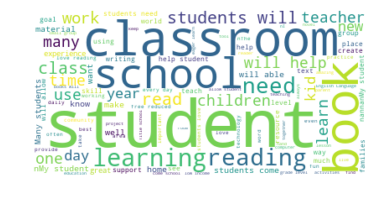

In [97]:
#plotting word cloud for cluster 3
words=''
for i in cluster3:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


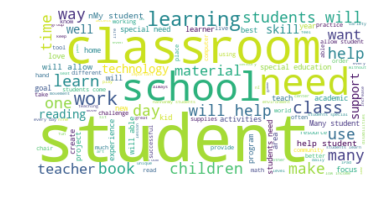

In [98]:
#plotting word cloud for cluster 4
words=''
for i in cluster4:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


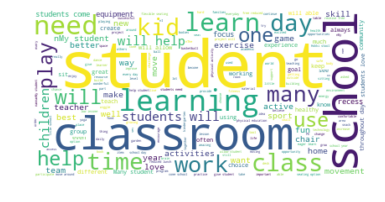

In [99]:
#plotting word cloud for cluster 5
words=''
for i in cluster5:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


<h2>2.7 Apply DBSCAN</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [100]:
final_train_5000.shape

(49000, 5000)

In [101]:
dbscan_5000=final_train_5000[0:5000]

In [110]:
#calculating the euclidean distances
from sklearn.metrics.pairwise import euclidean_distances

distance=euclidean_distances(dbscan_5000, dbscan_5000[1].reshape(1, -1))

In [113]:
distance[0:5]

array([[3.07096939],
       [3.13286466],
       [2.98826275],
       [0.        ],
       [2.65076333]])

In [112]:
sorted_distance=np.sort(distance)
print(sorted_distance)
print(len(sorted_distance))

[[3.07096939]
 [3.13286466]
 [2.98826275]
 ...
 [3.1822349 ]
 [3.17680047]
 [3.2526941 ]]
5000


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [06:00<00:00, 13.88it/s]


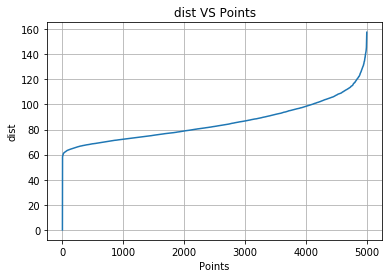

In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
dbnorm=StandardScaler().fit_transform(dbscan_5000.toarray())

distance=[]
min_points = 50
for point in tqdm(dbnorm):
    euc_dis = euclidean_distances(dbnorm, point.reshape(1, -1))
    distance.append(euc_dis[min_points])
sorted_distance = np.sort(np.array(distance))

sorted_dist = np.sort(sorted_distance.reshape(1,-1)[0])
points = [i for i in range(len(dbnorm))]

plt.plot(points, sorted_dist)
plt.xlabel('Points')
plt.ylabel('dist')
plt.title('dist VS Points')
plt.grid()
plt.show()

OBSERVATIONS:
   Here we took min_samples=1500 and plotted distance Vs points.
   As the graph straighetened after 80 we chose eps =80.

In [145]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=6,min_samples=50)
dbscan.fit(dbscan_5000,y_train[0:5000])

DBSCAN(algorithm='auto', eps=6, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=50, n_jobs=1, p=None)

In [146]:
set(dbscan.labels_)

{0}

In [147]:
cluster1=[]
for i in range(dbscan.labels_.shape[0]):
    if dbscan.labels_[i] == 0:
        cluster1.append(essays[i])
print(len(cluster1))

5000


In [148]:
for i in range(5):
    print((cluster1[i]))

Students at my school want to combine improving their physical fitness with the latest technology.  They love to move and by using this modern technology they will strive to improve their overall fitness level.\r\nThe technology that is out there today can help my students work for a personal goal that they can challenge themselves to improve on for the rest of their lives.  By being able to use this technology and see how if they work hard and are consistent they will improve their overall health!\r\nBy donating to The Fitbit project you are helping my students through the use of technology see how exercise can help them live better lives.  Daily exercise is important for everyone.  In order to teach children this they need to understand how their body functions.  With the fitbit they will be able to track their steps during PE class and during a normal day.  \r\nIf we do not teach our children about the importance of exercise now who will teach them when they are adults?  Children wh

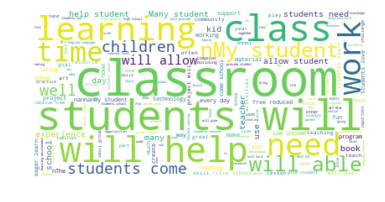

In [149]:
#plotting word cloud for cluster 1
words=''
for i in cluster1:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


<h1>3. Cocnlusions</h1>
<br> Please write down few lines of your observations on this assignment.

KMEANS:
    We used tfidf vectorizer for all the clustering techniques.
    We chose our number of clusters to be 5.
    We got clusters with different desities.
AGGLOMERATIVE CLUSTERING:
    Here we took only 5k data points.
    We done clustering for number of clusters to be 2 and 5.
    For both clustering we got  clusters with different densities.
DENSITY BASED CLUSTERING:
    Here we took only 5k data points.
    We took min_samples to be 50 and eps=60.
    we got only one cluster.
We plotted word clouds for all the clusters.
    